# Unsupervised Machine Learning for the Classification of Astrophysical X-ray Sources
###### *Víctor Samuel Pérez Díaz<sup>1,2</sup>, Rafael Martinez-Galarza<sup>1</sup>, Alexander Caicedo-Dorado<sup>3</sup>, Raffaele D'Abrusco<sup>1</sup>*

*1. Center for Astrophysics | Harvard & Smithsonian, 2. Universidad del Rosario, 3. Pontificia Universidad Javeriana*

Contact ```vperezdiaz@cfa.harvard.edu``` for questions or comments.


#### Comparison

---

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Edit the font, font size, and axes width

mpl.rcParams['font.family'] = 'Avenir LT Std'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2

#### Data preprocessing
---

In [3]:
df_classified_cscs = pd.read_csv('./out_data/classified_cscs.csv', index_col=0)
df_class_confident = pd.read_csv('./out_data/confident_classification.csv')
df_class_confused = pd.read_csv('./out_data/confused_classification.csv', index_col=0)

grouped_replace = {'AGN':'AGN+Seyfert','QSO': 'AGN+Seyfert', 'Seyfert_1': 'AGN+Seyfert', 'Seyfert_2': 'AGN+Seyfert', 'HMXB': 'XB', 'LMXB':'XB', 'TTau*':'YSO', 'Orion_V*': 'YSO'}
new_ltypes = ['AGN+Seyfert', 'XB', 'YSO']
ltypes = ['QSO', 'AGN', 'Seyfert_1', 'Seyfert_2', 'HMXB', 'LMXB', 'XB', 'YSO', 'TTau*', 'Orion_V*']

#### Yang et al. 2022 TD

---

In [4]:
df_yangetal_td = pd.read_csv("./comparison_data/TD.csv")
inter_df_conf_yangetal = df_class_confident.merge(df_yangetal_td, left_on='name', right_on='CSCv2_name', how='inner')

In [5]:
inter_df_conf_yangetal.shape

(116, 77)

In [258]:
class_name_to_count = 'AGN'
inter_df_conf_yangetal[inter_df_conf_yangetal.agg_master_class == class_name_to_count].groupby('Class')['name'].count()/inter_df_conf_yangetal[inter_df_conf_yangetal.agg_master_class == class_name_to_count].shape[0]

Class
AGN        0.277778
CV         0.166667
HM-STAR    0.111111
LM-STAR    0.055556
LMXB       0.166667
NS         0.166667
YSO        0.055556
Name: name, dtype: float64

In [215]:
class_name_to_count = 'XB'
inter_df_conf_yangetal[inter_df_conf_yangetal.master_class.replace(grouped_replace) == class_name_to_count].shape[0]

29

Text(83.0, 0.5, 'True')

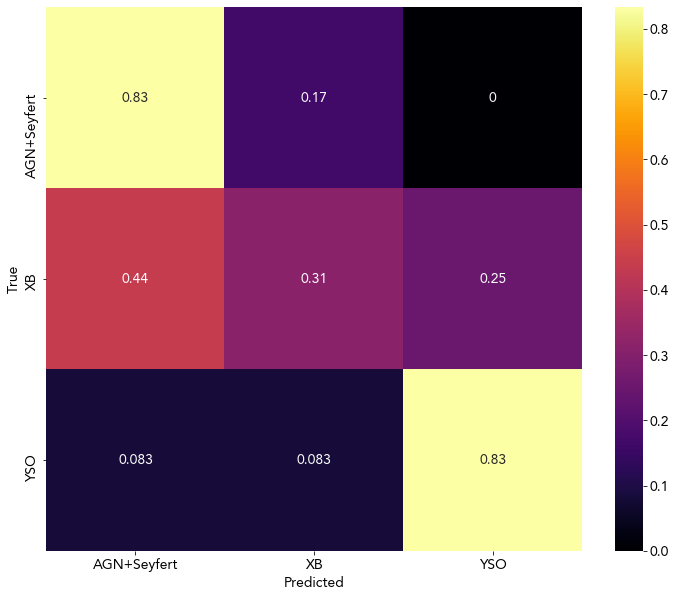

In [97]:
cf_matrix = confusion_matrix(inter_df_conf_yangetal.Class.replace(grouped_replace), inter_df_conf_yangetal.master_class.replace(grouped_replace), labels=new_ltypes, normalize='true')
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cf_matrix, annot=True, xticklabels = new_ltypes, yticklabels = new_ltypes, ax=ax, cmap="inferno")
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

In [75]:
print(classification_report(inter_df_conf_yangetal.Class.replace(grouped_replace), inter_df_conf_yangetal.master_class.replace(grouped_replace), labels=new_ltypes))

              precision    recall  f1-score   support

 AGN+Seyfert       0.32      0.83      0.47        12
          XB       0.17      0.31      0.22        16
         YSO       0.18      0.83      0.29        12

   micro avg       0.22      0.62      0.32        40
   macro avg       0.22      0.66      0.33        40
weighted avg       0.22      0.62      0.32        40



In [242]:
precision_score(inter_df_conf_yangetal.Class.replace(grouped_replace)[inter_df_conf_yangetal.Class.replace(grouped_replace).isin(new_ltypes)], inter_df_conf_yangetal.master_class.replace(grouped_replace)[inter_df_conf_yangetal.Class.replace(grouped_replace).isin(new_ltypes)], labels=new_ltypes, average=None)

array([0.55555556, 0.625     , 0.71428571])

In [ ]:
class_name_to_count = 'Seyfert'
inter_df_conf_yangetal[inter_df_conf_yangetal.agg_master_class == class_name_to_count].groupby('Class')['name'].count()/inter_df_conf_yangetal[inter_df_conf_yangetal.agg_master_class == class_name_to_count].shape[0]

In [191]:
inter_df_conf_yangetal.shape

(116, 77)

#### Yang et al. 2022 CCGCS
---

In [6]:
df_yangetal_gcs = pd.read_csv("./comparison_data/GCS.csv")
df_yangetal_ccgcs = df_yangetal_gcs[df_yangetal_gcs.CT >=2 ]
inter_df_conf_yangccgcs = df_class_confident.merge(df_yangetal_ccgcs, left_on='name', right_on='CSCv2_name', how='inner')

C:\Users\samue\miniconda3\envs\astrox\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
inter_df_conf_yangccgcs.shape

(1804, 74)

In [8]:
class_name_to_count = 'XB'
inter_df_conf_yangccgcs[inter_df_conf_yangccgcs.agg_master_class == class_name_to_count].groupby('Class')['name'].count()/inter_df_conf_yangccgcs[inter_df_conf_yangccgcs.agg_master_class == class_name_to_count].shape[0]

Class
AGN        0.749601
CV         0.012759
HMXB       0.001595
LM-STAR    0.028708
LMXB       0.049442
NS         0.106858
YSO        0.051037
Name: name, dtype: float64

In [9]:
print(classification_report(inter_df_conf_yangccgcs.Class.replace(grouped_replace), inter_df_conf_yangccgcs.master_class.replace(grouped_replace), labels=new_ltypes))

              precision    recall  f1-score   support

 AGN+Seyfert       0.94      0.62      0.74      1406
          XB       0.05      0.51      0.09        63
         YSO       0.36      0.72      0.48       129

   micro avg       0.55      0.62      0.58      1598
   macro avg       0.45      0.61      0.44      1598
weighted avg       0.86      0.62      0.70      1598



Text(83.0, 0.5, 'True')

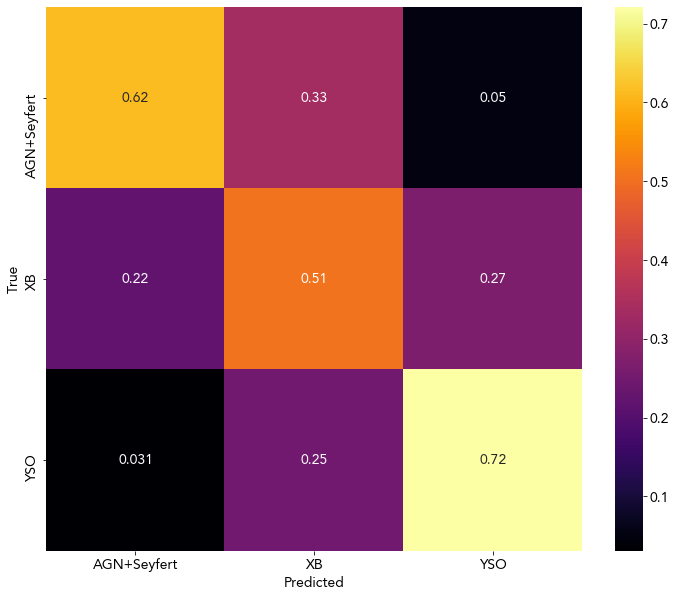

In [125]:
cf_matrix = confusion_matrix(inter_df_conf_yangccgcs.Class.replace(grouped_replace), inter_df_conf_yangccgcs.master_class.replace(grouped_replace), labels=new_ltypes, normalize='true')
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cf_matrix, annot=True, xticklabels = new_ltypes, yticklabels = new_ltypes, ax=ax, cmap="inferno")
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

In [259]:
class_name_to_count = 'AGN+Seyfert'
inter_df_conf_yangccgcs[inter_df_conf_yangccgcs.master_class.replace(grouped_replace) == class_name_to_count].shape[0]

922

In [243]:
precision_score(inter_df_conf_yangccgcs.Class.replace(grouped_replace)[inter_df_conf_yangccgcs.Class.replace(grouped_replace).isin(new_ltypes)], inter_df_conf_yangccgcs.master_class.replace(grouped_replace)[inter_df_conf_yangccgcs.Class.replace(grouped_replace).isin(new_ltypes)], labels=new_ltypes, average=None)

array([0.97961495, 0.05992509, 0.51381215])

#### Tranin et al. 2022

---

In [126]:
df_tranin = pd.read_csv("./comparison_data/tranin_cmatch.csv")

In [261]:
df_tranin.shape

(2006, 104)

In [178]:
df_tranin[df_tranin.name_1 == '2CXO J013301.0+304043']

,name_1,agg_master_class,master_class,detection_count,Orion_V*,QSO,AGN,Seyfert_1,Seyfert_2,HMXB,...,quality,Pba_AGN,Pba_Star,Pba_XRB,Pba_CV,class,classification,alternative,outlier,Separation
1553,2CXO J013301.0+304043,XB,HMXB,1,0.0Â±0.001,0.0Â±0.0,0.0Â±0.0,0.0Â±0.0,0.0Â±0.0,0.0Â±0.75,...,2,0.000263,1.541000e-07,0.9988,0.000907,NaN,XRB,NaN,8.358,0.300492


In [189]:
df_tranin[df_tranin.name_1 == '2CXO J013324.4+304402']

,name_1,agg_master_class,master_class,detection_count,Orion_V*,QSO,AGN,Seyfert_1,Seyfert_2,HMXB,...,quality,Pba_AGN,Pba_Star,Pba_XRB,Pba_CV,class,classification,alternative,outlier,Separation
22,2CXO J013324.4+304402,XB,HMXB,11,0.277Â±0.172,0.007Â±0.005,0.024Â±0.02,0.004Â±0.002,0.343Â±0.208,0.376Â±0.429,...,2,0.005784,0.000003,0.9886,0.005659,NaN,XRB,AGN,7.337,0.385386


In [131]:
grouped_replace_tranin = {'AGN':'AGN+Seyfert','QSO': 'AGN+Seyfert', 'Seyfert_1': 'AGN+Seyfert', 'Seyfert_2': 'AGN+Seyfert', 'XRB': 'XB', 'HMXB': 'XB', 'LMXB':'XB', 'TTau*':'YSO', 'Orion_V*': 'YSO'}

In [144]:
print(classification_report(df_tranin.classification.replace(grouped_replace_tranin), df_tranin.master_class.replace(grouped_replace_tranin), labels=['AGN+Seyfert', 'XB']))

              precision    recall  f1-score   support

 AGN+Seyfert       0.76      0.62      0.69      1116
          XB       0.42      0.42      0.42       652

   micro avg       0.62      0.55      0.58      1768
   macro avg       0.59      0.52      0.55      1768
weighted avg       0.64      0.55      0.59      1768



In [140]:
class_name_to_count = 'YSO'
df_tranin[df_tranin.agg_master_class == class_name_to_count].groupby('classification')['name_1'].count()/df_tranin[df_tranin.agg_master_class == class_name_to_count].shape[0]

classification
AGN     0.197701
CV      0.009195
Star    0.386207
XRB     0.406897
Name: name_1, dtype: float64

In [266]:
class_name_to_count = 'YSO'
df_tranin[df_tranin.agg_master_class == class_name_to_count].groupby('classification')['name_1'].count()/df_tranin[df_tranin.agg_master_class == class_name_to_count].shape[0]

435

In [268]:
class_name_to_count = 'XB'
df_tranin[df_tranin.master_class.replace(grouped_replace_tranin) == class_name_to_count].shape[0]

659

In [248]:
precision_score(df_tranin.classification.replace(grouped_replace_tranin)[df_tranin.classification.replace(grouped_replace_tranin).isin(['AGN+Seyfert', 'XB'])], df_tranin.master_class.replace(grouped_replace_tranin)[df_tranin.classification.replace(grouped_replace_tranin).isin(['AGN+Seyfert', 'XB'])], labels=['AGN+Seyfert', 'XB'], average=None)

array([0.77678571, 0.45155993])

#### Toba et al. 2022

---

In [148]:
df_toba = pd.read_csv("./comparison_data/toba_cmatch.csv")

In [288]:
df_toba.HMXB

0      0.0ÃÂ±0.0
1    0.0ÃÂ±0.001
2      0.0ÃÂ±0.0
3      0.0ÃÂ±0.0
4      0.0ÃÂ±1.0
5    0.0ÃÂ±0.001
6      0.0ÃÂ±0.0
7    0.0ÃÂ±0.003
Name: HMXB, dtype: object

In [162]:
df_toba.Type

0      Sy1
1      Sy1
2      Sy1
3    LINER
4       SF
5      Sy2
6      Sy1
7       SF
Name: Type, dtype: object

In [158]:
df_toba_2 = pd.read_csv("./comparison_data/toba_cmatch_2.csv")

In [212]:
print(classification_report(['AGN+Seyfert']*37, df_toba_2.master_class.replace(grouped_replace), labels=['AGN+Seyfert']))

              precision    recall  f1-score   support

 AGN+Seyfert       1.00      0.70      0.83        37

   micro avg       1.00      0.70      0.83        37
   macro avg       1.00      0.70      0.83        37
weighted avg       1.00      0.70      0.83        37



#### Dominic et al. 2022

Obscured AGNs

---


In [169]:
df_dominic = pd.read_csv("./comparison_data/obscured_agns.csv")
inter_df_conf_dominic = df_class_confident.merge(df_dominic, left_on='name', right_on='name', how='inner')

In [224]:
df_dominic

,name
0,2CXO J000735.6+193206
1,2CXO J000917.2-321938
2,2CXO J002404.9-720455
3,2CXO J004429.0-202538
4,2CXO J004732.0-251721
...,...
116,2CXO J215141.1-055049
117,2CXO J215748.2-694153
118,2CXO J223846.8+751132
119,2CXO J230139.0-400719


In [206]:
inter_df_conf_dominic.master_class.replace(grouped_replace)

0             YSO
1             YSO
2             YSO
3             YSO
4             YSO
5             YSO
6              XB
7             YSO
8              XB
9              XB
10            YSO
11             XB
12            YSO
13    AGN+Seyfert
14             XB
15            YSO
16    AGN+Seyfert
17            YSO
18            YSO
19             XB
20    AGN+Seyfert
21    AGN+Seyfert
22             XB
23    AGN+Seyfert
24             XB
25            YSO
26             XB
Name: master_class, dtype: object

In [223]:
inter_df_conf_dominic

,name,agg_master_class,master_class,detection_count,Orion_V*,QSO,AGN,Seyfert_1,Seyfert_2,HMXB,LMXB,XB,YSO,TTau*
0,2CXO J132525.7-430055,YSO,YSO,8,0.247±0.101,0.0±0.0,0.081±0.031,0.0±0.0,0.0±0.0,0.0±0.0,0.0±0.0,0.0±0.0,0.328±0.868,0.0±0.0
1,2CXO J095550.3+694036,YSO,Orion_V*,7,0.414±0.383,0.123±0.05,0.219±0.137,0.001±0.001,0.0±0.0,0.006±0.003,0.439±0.364,0.0±0.0,0.11±0.062,0.0±0.0
2,2CXO J053511.5-052447,YSO,YSO,6,0.026±0.012,0.0±0.0,0.299±0.17,0.0±0.0,0.0±0.0,0.0±0.0,0.019±0.009,0.0±0.0,0.33±0.801,0.014±0.009
3,2CXO J053514.3-052308,YSO,YSO,6,0.147±0.135,0.0±0.0,0.0±0.0,0.0±0.0,0.0±0.0,0.002±0.001,0.001±0.0,0.0±0.0,0.157±0.817,0.074±0.046
4,2CXO J132959.0+471318,YSO,Orion_V*,5,0.241±0.367,0.0±0.0,0.0±0.0,0.0±0.0,0.0±0.0,0.018±0.015,0.22±0.309,0.0±0.0,0.313±0.309,0.0±0.0
5,2CXO J132526.1-430132,YSO,YSO,5,0.16±0.082,0.0±0.0,0.0±0.0,0.0±0.0,0.0±0.0,0.0±0.0,0.487±0.398,0.0±0.0,0.449±0.519,0.0±0.0
6,2CXO J132524.1-425959,XB,HMXB,4,0.047±0.027,0.0±0.0,0.006±0.003,0.001±0.001,0.002±0.001,0.148±0.851,0.134±0.083,0.0±0.0,0.056±0.034,0.0±0.0
7,2CXO J053517.6-052153,YSO,YSO,4,0.009±0.009,0.0±0.0,0.0±0.0,0.0±0.0,0.0±0.0,0.0±0.0,0.433±0.25,0.0±0.0,0.428±0.741,0.0±0.0
8,2CXO J130525.4-492831,XB,LMXB,2,0.0±0.0,0.0±0.0,0.461±0.461,0.001±0.001,0.027±0.027,0.001±0.002,0.49±0.508,0.0±0.0,0.0±0.001,0.0±0.0
9,2CXO J130540.7-492603,XB,LMXB,2,0.019±0.122,0.0±0.0,0.021±0.037,0.0±0.0,0.0±0.0,0.016±0.043,0.19±0.59,0.0±0.0,0.166±0.208,0.0±0.0


In [208]:
print(classification_report(['AGN+Seyfert']*27, inter_df_conf_dominic.master_class.replace(grouped_replace), labels=['AGN+Seyfert']))

              precision    recall  f1-score   support

 AGN+Seyfert       1.00      0.19      0.31        27

   micro avg       1.00      0.19      0.31        27
   macro avg       1.00      0.19      0.31        27
weighted avg       1.00      0.19      0.31        27



In [205]:
inter_df_conf_dominic.groupby('agg_master_class')['name'].count()/27

agg_master_class
AGN        0.074074
Seyfert    0.111111
XB         0.333333
YSO        0.481481
Name: name, dtype: float64